In [320]:
# estamos

## PARTE I: ANALIZANDO LA BASE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Bases Tizi
base_04_sucia = pd.read_stata(r"C:\Users\rolan\OneDrive\Tizi UdeSA\8- Ciencia de datos\Compu Casa\CC408-T1-4\TP3\Individual_t104.dta")
base_24_sucia = pd.read_excel(r"C:\Users\rolan\OneDrive\Tizi UdeSA\8- Ciencia de datos\Compu Casa\CC408-T1-4\TP3\usu_individual_T124.xlsx")

In [4]:
# Base Angie
#base_04_sucia = pd.read_stata(r'/Users/angelanavajas/Desktop/Ciencia de datos/CC408-T1-4/TP3/Individual_t104.dta')
#base_24_sucia = pd.read_excel(r'/Users/angelanavajas/Desktop/Ciencia de datos/CC408-T1-4/TP3/usu_individual_T124.xlsx')

#### PUNTO A. 
Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires, y unan ambos trimestres en una sola base.

In [140]:
# me quedo solo con los valores de CABA y GBA
base_04_filtrada = base_04_sucia.loc[base_04_sucia['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])]
base_24_filtrada = base_24_sucia.loc[base_24_sucia['AGLOMERADO'].isin([32, 33])]

In [141]:
# Obtener los nombres de las variables
nombres_variables04 = base_04_sucia.columns.tolist()
print(nombres_variables04)

# Obtener los nombres de las variables
nombres_variables24 = base_24_filtrada.columns.tolist()
print(nombres_variables24)

#Para poder unir sin problema, me aseguro que als variables esten en el mismo formato
base_04_filtrada.columns = base_04_filtrada.columns.str.lower()
base_24_filtrada.columns = base_24_filtrada.columns.str.lower()

# veo si cambio
nombres_variables24 = base_24_filtrada.columns.tolist()
print(nombres_variables24)

['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', '

In [142]:
# concateno las bases
base_prelimpieza = pd.concat([base_24_filtrada, base_04_filtrada])
print(base_prelimpieza)

                             codusu    ano4       trimestre  nro_hogar  \
245   TQRMNOSUWHLKMUCDEIJAH00855260  2024.0               1        1.0   
246   TQRMNOSUWHLKMUCDEIJAH00855260  2024.0               1        1.0   
247   TQRMNOSUWHLKMUCDEIJAH00855260  2024.0               1        1.0   
255   TQSMNORWVHLLKQCDEIJAH00856914  2024.0               1        1.0   
256   TQRMNOPQQHLOLRCDEIJAH00855133  2024.0               1        1.0   
...                             ...     ...             ...        ...   
7642                       288171    2004.0  1er. Trimestre        1.0   
7643                       288405    2004.0  1er. Trimestre        1.0   
7644                       288405    2004.0  1er. Trimestre        1.0   
7645                       288405    2004.0  1er. Trimestre        1.0   
7646                       288405    2004.0  1er. Trimestre        1.0   

     componente  h15             region mas_500        aglomerado  pondera  \
245           1    1             

Las variables que vamos a usar son:
- CH04: Sexo
- CH06: Años
- CH07: Estado civil 
- CH08: Estado cobertura médica
- NIVEL_ED: Nivel educativo 
- ESTADO: Condicion de actividad
- CAT_INAC: Categoria de inactividad
- IPCF: Monto de ingreso per cápita familiar percibido en el mes de referencia

In [159]:
# como hay datos que tienen distintas etiquetas en las dos bases que concatenamos, tenemos que unificar renombrar las etiquetas de una de las bases asi se pueden tener todos los datos con el mismo valor

############ FALTA EL VALOR DE UNA ETIQUETA DE LA COLUMNA CH08 PARA REEMPLAZARLO

variables_interes = base_prelimpieza[["ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado", "cat_inac"]]

for i in variables_interes:
    if i == "ch04": 
        base_prelimpieza['ch04'] = base_prelimpieza['ch04'].replace({
            'Mujer': 2,
            'Varón': 1})
    elif i == "ch06":
        base_prelimpieza['ch06'] = base_prelimpieza['ch06'].replace({
            '98 y más años' : 98, 
            'Menos de 1 año' : 0,
            -1 : 0})
        # cambio el formato de los valores de esta columna porque la mitad estaba en float y la mitas en int
        base_prelimpieza['ch06'] = base_prelimpieza['ch06'].astype(int)
    elif i == "ch07":
        base_prelimpieza['ch07'] = base_prelimpieza['ch07'].replace({
            'Unido': 1, 
            'Casado': 2, 
            'Separado o divorciado': 3, 
            'Viudo': 4, 
            'Soltero': 5})
    elif i == "ch08":
        base_prelimpieza['ch08'] = base_prelimpieza['ch08'].replace({
            'Obra social (incluye PAMI)': 1,  
            'Mutual/Prepaga/Servicio de emergencia': 2,  
            'Planes y seguros públicos': 3,  
            'No paga ni le descuentan': 4,  
            'Ns./Nr.': 9,  
            'Obra social y mutual/prepaga/servicio de emergencia': 12,  
            'Obra social y planes y seguros públicos': 13,  
            'Mutual/Prepaga/Servicio de emergencia': 23,
            'Obra Social': 123
        # FALTA EL CODIGO DE "Mutual/prepaga/servicio de emergencia/planes y seguros públi" :
        })
    elif i == "nivel_ed":
        base_prelimpieza['nivel_ed'] = base_prelimpieza['nivel_ed'].replace({
            'Primaria Incompleta (incluye educación especial)': 1,  
            'Primaria Completa': 2,  
            'Secundaria Incompleta': 3,  
            'Secundaria Completa': 4,  
            'Superior Universitaria Incompleta': 5,  
            'Superior Universitaria Completa': 6, 
            'Sin instrucción': 7,  
            'Ns./Nr.': 9})
    elif i == "estado":
        base_prelimpieza['estado'] = base_prelimpieza['estado'].replace({
            'Ocupado': 1,  
            'Desocupado': 2,  
            'Inactivo': 3,  
            'Menor de 10 años': 4,  
            'Entrevista individual no realizada (no respuesta al cuestion': 0})
    elif i == "cat_inac":
        base_prelimpieza['cat_inac'] = base_prelimpieza['cat_inac'].replace({
            0.0 : 0,
            'Jubilado/pensionado': 1,  
            'Rentista': 2,  
            'Estudiante': 3,  
            'Ama de casa': 4,  
            'Menor de 6 años': 5,  
            'Discapacitado': 6,  
            'Otros': 7})
    conteo = base_prelimpieza.groupby(i).size()
    print("\n", "La cantidad de datos en la variable", i, "por valor de etiqueta", "\n", conteo)


 La cantidad de datos en la variable ch04 por valor de etiqueta 
 ch04
1    6973
2    7725
dtype: int64

 La cantidad de datos en la variable ch06 por valor de etiqueta 
 ch06
0     182
1     180
2     198
3     191
4     199
     ... 
94      4
95      2
96      4
97      1
98      4
Length: 99, dtype: int64

 La cantidad de datos en la variable ch07 por valor de etiqueta 
 ch07
1    2118
2    3879
3     797
4     829
5    7062
9      13
dtype: int64

 La cantidad de datos en la variable ch08 por valor de etiqueta 
 ch08
1                                                               7876
2                                                                566
3                                                                 49
4                                                               5321
9                                                                 36
12                                                               232
13                                                       

In [147]:
#sneak peek de como queda la base toda con datos numericos
print(base_prelimpieza[["ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado", "cat_inac"]])

      ch04  ch06  ch07 ch08  nivel_ed estado  cat_inac
245      2    85     4    1         2      1         0
246      1    59     2    1         6      1         0
247      2    57     2    1         6      1         0
255      1    26     5    1         6      1         0
256      2    88     4    1         1      3         1
...    ...   ...   ...  ...       ...    ...       ...
7642     2     1     5   23         7      4         5
7643     1    51     2    1         2      1         0
7644     2    55     2    1         2      1         0
7645     2    12     5    1         1      3         3
7646     1    22     5    1         4      1         0

[14698 rows x 7 columns]


#### PUNTO B 
Si hay observaciones con valores que no tienen sentido,
descártenlas (por ejemplo, ingresos y edades negativos). Expliquen
las decisiones tomadas.

In [346]:
base_prelimpieza['ch06'] = pd.to_numeric(base_prelimpieza['ch06'], errors='coerce')
#Saco las edades negativas
base_prelimpieza1 = base_prelimpieza[base_prelimpieza['ch06'] >= 0]

In [347]:
valores_negativos = base_prelimpieza1[base_prelimpieza1['ipcf'] < 0]
cantidad_negativos = len(valores_negativos)
# Mostrar resultados
print(f'Cantidad de valores negativos en "ipcf": {cantidad_negativos}')
if cantidad_negativos > 0:
    print('Valores negativos encontrados:')
    print(valores_negativos['ipcf'])
else:
    print('No se encontraron valores negativos en "ipcf".')

Cantidad de valores negativos en "ipcf": 0
No se encontraron valores negativos en "ipcf".


In [360]:
# Calcular cada estadística por separado
count_ipcf = base_prelimpieza['ipcf'].count()
mean_ipcf = base_prelimpieza['ipcf'].mean()
std_ipcf = base_prelimpieza['ipcf'].std()
min_ipcf = base_prelimpieza['ipcf'].min()
max_ipcf = base_prelimpieza['ipcf'].max()

# Mostrar las estadísticas
print(f"count: {count_ipcf}")
print(f"mean: {mean_ipcf:.2f}")
print(f"std: {std_ipcf:.2f}")
print(f"min: {min_ipcf:.2f}")
print(f"max: {max_ipcf:.2f}")

count: 14698
mean: 76978.86
std: 278296.61
min: 0.00
max: 11312333.33


In [351]:
# Dice que no se hizo la entrevista (h15 == 2)
h15_no = base_prelimpieza[base_prelimpieza['h15'] == 2]
respuestas = h15_no[['h15','ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]
print(respuestas)

      h15   ch04  ch06 ch07 ch08 nivel_ed estado cat_inac  ipcf
399     2  mujer  49.0    2    4        2      0        0   0.0
400     2  mujer  25.0    5    4        6      0        0   0.0
401     2  varón  20.0    5    4        5      0        0   0.0
409     2  varón  74.0    5    2        5      0        0   0.0
410     2  varón  21.0    9    9        5      0        0   0.0
411     2  varón  21.0    9    9        5      0        0   0.0
5564    2  varón  77.0    1    1        3      0        0   0.0
15241   2  varón  45.0    1    4        4      0        0   0.0
17096   2  varón  45.0    2    2        6      0        0   0.0
19483   2  varón  15.0    9    9        3      0        0   0.0
19484   2  varón  53.0    9    9        2      0        0   0.0
19485   2  varón  15.0    9    9        3      0        0   0.0
19486   2  varón  15.0    9    9        3      0        0   0.0
19597   2  mujer  38.0    9    9        4      0        0   0.0
19598   2  varón  40.0    9    9        

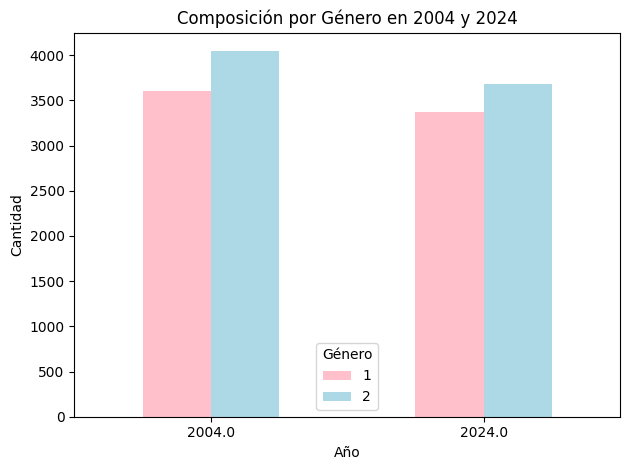

In [395]:
# Contar la cantidad de hombres y mujeres por año
composicion = base_prelimpieza.groupby(['ano4', 'ch04']).size().unstack(fill_value=0)
composicion.plot(kind='bar', color=['pink', 'lightblue'])

# Gráfico
plt.title('Composición por Género en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Para tener las etiquetas en horizontal
plt.legend(title='Género')
plt.tight_layout()  # Ajustar el layout
plt.show()

#AGREGAR ETIQUETA QUE PONGA QUE 2 ES MUJER

In [396]:
#Matriz de correlacion
# Step 1 - Make a scatter plot with square markers, set column names as labels

def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

In [399]:
variable_matriz = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']
base_variables = base_prelimpieza[variable_matriz]

# Mostrar la nueva base de datos
print(base_variables)

     ch04  ch06 ch07 ch08 nivel_ed estado cat_inac           ipcf
245     2    85    4    1        2      1        0       0.000000
246     1    59    2    1        6      1        0       0.000000
247     2    57    2    1        6      1        0       0.000000
255     1    26    5    1        6      1        0  500000.000000
256     2    88    4    1        1      3        1       0.000000
...   ...   ...  ...  ...      ...    ...      ...            ...
7642    2   1.0    5    2        7      4        5     533.333333
7643    1  51.0    2    1        2      1      0.0     100.000000
7644    2  55.0    2    1        2      1      0.0     100.000000
7645    2  12.0    5    1        1      3        3     100.000000
7646    1  22.0    5    1        4      1      0.0     100.000000

[14698 rows x 8 columns]


In [404]:
# Filtra las columnas no numéricas
non_numeric_cols = base_variables.select_dtypes(include=['object']).columns
print(non_numeric_cols)

Index(['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac'], dtype='object')


In [403]:
matriz = base_variables.corr()
matriz = pd.melt(matriz.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
matriz.columns = ['x', 'y', 'value']
heatmap(
    x=matriz['x'],
    y=matriz['y'],
    size=matriz['value'].abs()
)

ValueError: could not convert string to float: 'Menos de 1 año'